# Experimento 5: Caracterização de Divisor de Potência

**Nome:** Lucas Guimarães Braga **RA:** 182543

**Nome:** Lucas Zenichi Terada **RA:** 182775

**Nome:** Nícolas Franco Rufino Almeida Prado **RA:** 185142



In [2]:
# Helper imports and definitions

import numpy
from matplotlib import pyplot

%matplotlib inline

def float2(s):
    return float(s.replace(b',', b'.'))

def load_spectrum_csv(filename):
    data = numpy.loadtxt(filename, delimiter=';', skiprows=15, usecols=[0, 1], converters={0: float2, 1: float2})
    return tuple(data[:, i] for i in range(data.shape[1]))

# Caracterização dos parâmetros S da placa

Como vimos durante o projeto, a matriz de parâmetros de espalhamento de um divisor de Wilkinson ideal é:

\begin{equation}
\textbf{S} = -i\frac{\sqrt{2}}{2} \begin{bmatrix}
0 & 1 & 1 \\
1 & 0 & 0 \\
1 & 0 & 0
\end{bmatrix}
\end{equation}

Neste experimento, faremos a caracterização dos parâmetros S do divisor projetado e fabricado.

# Perdas de Reflexão (Casamento)

Apresente o esquemático utilizado para medição dos parâmetros de casamento da placa
($|S_{11}|^2$, $|S_{22}|^2$ e $|S_{33}|^2$).

Faça um gráfico com esses parâmetros medidos e discuta os resultados obtidos.

![Caracterização do casamento](s11.png)
<center>Figura 1: Esquemático para caracterização do parâmetro S11</center>

![Caracterização do casamento](s22.png)
<center>Figura 2: Esquemático para caracterização do parâmetro S22</center>

![Caracterização do casamento](s33.png)
<center>Figura 3: Esquemático para caracterização do parâmetro S33</center>

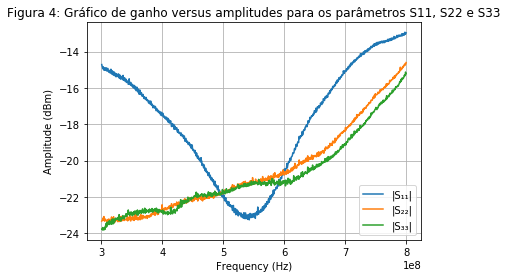

In [5]:
# Plot signals from spectrum analyzer
# Do not forget to modify the legend and axes labels according to your setup
freq1, s11 = load_spectrum_csv('s11.csv')
freq2, s22 = load_spectrum_csv('s22.csv')
freq3, s33 = load_spectrum_csv('s33.csv')
s11 = s11 + 18.984
s22 = s22 + 18.984
s33 = s33 + 18.984

pyplot.plot(freq1, s11, label='|S₁₁|')
pyplot.plot(freq2, s22, label='|S₂₂|')
pyplot.plot(freq3, s33, label='|S₃₃|')
pyplot.legend()
pyplot.title('Figura 4: Gráfico de ganho versus amplitudes para os parâmetros S11, S22 e S33')
pyplot.xlabel('Frequency (Hz)')
pyplot.ylabel('Amplitude (dBm)')
pyplot.grid(True)

**RESPOSTA** Considerando que a ponte possui um ganho de -18.984dBm, foi somado esse valor ao gráfico original para que essa perda característica da montagem fosse levada em consideração. Pode-se analisar que o projeto foi bem sucedido, visto que na frequência em torno de 490Mhz podemos observar uma queda de aproximadamente -21.9dBm (0.08 de amplitude), ou seja, um valor muito pequeno (aproximadamente zero), o que para os três parâmetros indica uma baixa reflexão do sinal acoplado em cada entrada, que é o funcionamento desejado.

# Perdas de Inserção (Transmissão)

Apresente o esquemático utilizado para medição dos parâmetros de transmissão de potência da placa ($|S_{21}|^2$ e $|S_{31}|^2$).

Faça um gráfico com esses parámetros medidos e discuta os resultados obtidos.

![Caracterização do casamento](s21.png)
<center>Figura 5: Esquemático para caracterização do parâmetro S21</center>

![Caracterização do casamento](s31.png)
<center>Figura 6: Esquemático para caracterização do parâmetro S31</center>

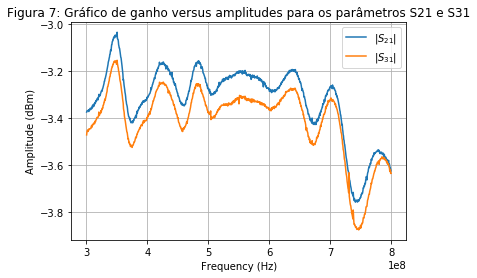

In [6]:
# Plot signals from spectrum analyzer
#Ganho entre os cabos BNCs em um arquivo CSV perdas_cabo
freq1, s21 = load_spectrum_csv('s21.csv')
freq2, s31 = load_spectrum_csv('s31.csv')
freq_loss, loss = load_spectrum_csv('perdas_cabo.csv')

s21 = s21 - loss
s31 = s31 - loss

pyplot.plot(freq1, s21, label='|$S_{21}$|')
pyplot.plot(freq2, s31, label='|$S_{31}$|')
pyplot.legend()
pyplot.xlabel('Frequency (Hz)')
pyplot.ylabel('Amplitude (dBm)')
pyplot.title('Figura 7: Gráfico de ganho versus amplitudes para os parâmetros S21 e S31')
pyplot.grid(True)

**RESPOSTA:** Como se pode perceber pelo gráfico, o valor de $S_{21}$ e $S_{31}$ são aproximadamente constantes ao longo do espectro analisado, com valor próximo de -3.4 dBm, ou $10^{-3.5/20} \approx 0.668$ em escala linear, valor bem próximo do esperado, de $\sqrt{2}/2 \approx 0.707$.
Portanto a característica de transmissão do divisor de potência foi satisfatória.

# Isolação

Apresente o esquemático utilizado para medição do parâmetro de isolação da placa ($|S_{23}|^2$).

Faça um gráfico com esses parámetros medidos e discuta os resultados obtidos.

![Caracterização do casamento](s23.png)
<center>Figura 8: Esquemático para caracterização do parâmetro S23</center>

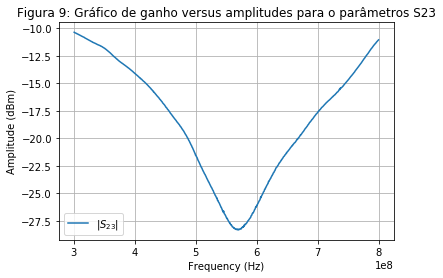

In [7]:
# Plot signals from spectrum analyzer
#Ganho entre os cabos BNCs em um arquivo CSV perdas_cabo
freq1, s23 = load_spectrum_csv('s23.csv')
freq_loss, loss = load_spectrum_csv('perdas_cabo.csv')

s23 = s23 - loss

pyplot.plot(freq1, s23, label='|$S_{23}$|')
pyplot.legend()
pyplot.xlabel('Frequency (Hz)')
pyplot.ylabel('Amplitude (dBm)')
pyplot.title('Figura 9: Gráfico de ganho versus amplitudes para o parâmetros S23')

pyplot.grid(True)

**RESPOSTA:** De acordo com o gráfico acima, percebe-se que o corte ocorre em toda a banda analisada já que o sinal possui amplitude entre -10dBm (aproximadamente 0.316) e -27.5dBm (aproximadamente 0.042), o que condiz com os valores obtidos no experimento 4 para a caracterização do parâmetro $S_{23}$. Vale ressaltar que o o parâmetro $S_{23}$ mostra a interferência entre as portas 2 e 3, logo seu valor próximo de zero (na faixa que contém a frequência de operação) evidencia um bom projeto de divisor de potência.

# Orientação para submissão do relatório final

Após finalizar o experimento e o relatório:

1. Gere um arquivo PDF do roteiro completo: clique em *File/Print Preview* e gere o PDF;
1. **Revise** seu relatório;
1. Envie o relatório final pelo site do curso (apenas um aluno envia pelo grupo);
1. Crie um backup do seu relatório (arquivos ipynb e PDF) e guarde com você;
1. Apague os seus arquivos de trabalho do computador.
 
Assegure-se de que:
- O início do relatório indentifica os alunos e os respectivos RAs;
- Todas as figuras foram carregadas apropriadamente e estão legíveis;
- O texto das respostas nas células não está incompleto ou cortado;
- As grandezas apresentadas no texto e nos cálculos possuem unidades;
- Seus resultados sejam referenciados e discutidos no texto.